In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Data_processed.csv", encoding="ISO-8859-1")
data.head()

,Formula,Excitation,Emission,4T1,4T2,Ref,H,Li,Be,B,...,Cs,Ba,La,Eu,Gd,Lu,Ta,W,Pb,Bi
0,K2Ti0.992F6Mn0.008,450,630,405.0,450.0,https://doi.org/10.1038/s41377-018-0013-1,0.0,0.0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,K2Ti0.999F6Mn0.001,450,631,405.0,450.0,https://doi.org/10.1038/s41377-018-0013-1,0.0,0.0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,K2Ti0.843F6Mn0.157,450,636,405.0,450.0,https://doi.org/10.1038/s41377-018-0013-1,0.0,0.0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,K2Ti0.843F6Mn0.157,450,631,405.0,450.0,https://doi.org/10.1038/s41377-018-0013-1,0.0,0.0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Mg2Ti0.9999O4Mn0.0001,475,655,325.0,475.0,https://doi.org/10.1039/C3TC30553H,0.0,0.0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.columns

Index(['Formula', 'Excitation', 'Emission', '4T1', '4T2', 'Ref', 'H', 'Li',
       'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'Cl', 'K',
       'Ca', 'Sc', 'Ti', 'V', 'Mn', 'Co', 'Zn', 'Ga', 'Ge', 'Rb', 'Sr', 'Y',
       'Zr', 'Nb', 'Mo', 'In', 'Sn', 'Sb', 'Te', 'Cs', 'Ba', 'La', 'Eu', 'Gd',
       'Lu', 'Ta', 'W', 'Pb', 'Bi'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Formula     1734 non-null   object 
 1   Excitation  1734 non-null   int64  
 2   Emission    1734 non-null   int64  
 3   4T1         1701 non-null   float64
 4   4T2         1701 non-null   float64
 5   Ref         1734 non-null   object 
 6   H           1734 non-null   float64
 7   Li          1734 non-null   float64
 8   Be          1734 non-null   int64  
 9   B           1734 non-null   float64
 10  C           1734 non-null   int64  
 11  N           1734 non-null   int64  
 12  O           1734 non-null   float64
 13  F           1734 non-null   float64
 14  Na          1734 non-null   float64
 15  Mg          1734 non-null   float64
 16  Al          1734 non-null   float64
 17  Si          1734 non-null   float64
 18  P           1734 non-null   float64
 19  Cl          1734 non-null  

In [5]:
data = data[data["Emission"].notna()]

In [6]:
features = ['H', 'Li', 'Be', 'B', 'C', 'N', 'O',
       'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V',
       'Mn', 'Co', 'Zn', 'Ga', 'Ge', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'In',
       'Sn', 'Sb', 'Te', 'Cs', 'Ba', 'La', 'Eu', 'Gd', 'Lu', 'Ta', 'W', 'Pb',
       'Bi']
a = data[features]*100
a = a.apply(lambda col: col.map(lambda x: 0 if isinstance(x, float) and x == 0.0 else x))
a = a.values
np.shape(a), a[0]

((1734, 44),
 array([  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. , 600. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. , 200. ,   0. ,   0. ,  99.2,
          0. ,   0.8,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ]))

In [7]:
result  = ['Emission']
b = data[result]
b = b.values
np.shape(b), b
np.mean(b)

672.9025374855825

### Spliting dataset

In [8]:
random_state_number = 2

In [9]:
from sklearn.model_selection import train_test_split
a_train, a_valid, b_train, b_valid = train_test_split(a, b, test_size=0.2, random_state = random_state_number)

b_train = np.ravel(b_train)
b_valid = np.ravel(b_valid)

a_train.shape

(1387, 44)

### ExtraTreesRegressor

In [10]:
# Find hyparameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

# Khởi tạo mô hình
et_model = ExtraTreesRegressor(random_state=2)

param_grid = {
    "random_state": range(1, 10, 1),
    "n_estimators": range(10, 101, 10),  
}

# Sử dụng GridSearchCV
grid_search = GridSearchCV(
    estimator=et_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  
    cv=5,  
    n_jobs=-1,  
    verbose=2,
)

# Huấn luyện GridSearchCV
grid_search.fit(a_train, b_train)

# Kết quả
print("Best Parameters:", grid_search.best_params_)
print("Best Score (negative MSE):", grid_search.best_score_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'n_estimators': 40, 'random_state': 5}
Best Score (negative MSE): -30.02935173418124


In [11]:
# Cross validation
best_model = grid_search.best_estimator_
print("Best model:", best_model)

# ---- R2 ----
cv_r2 = cross_val_score(best_model, a_train, b_train, 
                        cv=5, scoring='r2')
print("Cross-validation R2:", cv_r2)
print("Mean R2:", np.mean(cv_r2))

# ---- RMSE ----
rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=False
)

cv_rmse = cross_val_score(best_model, a_train, b_train,
                          cv=5, scoring=rmse_scorer)
print("Cross-validation RMSE:", -cv_rmse)    # đổi dấu từ negative
print("Mean RMSE:", -np.mean(cv_rmse))

# ---- 3. Tính MAE ----
mae_scorer = make_scorer(
    lambda y_true, y_pred: mean_absolute_error(y_true, y_pred),
    greater_is_better=False
)

cv_mae = cross_val_score(best_model, a_train, b_train,
                         cv=5, scoring=mae_scorer)
print("Cross-validation MAE:", -cv_mae)
print("Mean MAE:", -np.mean(cv_mae))


Best model: ExtraTreesRegressor(n_estimators=40, random_state=5)
Cross-validation R2: [0.9718891  0.95845751 0.97690532 0.96410168 0.9512627 ]
Mean R2: 0.9645232620442152
Cross-validation RMSE: [4.86402195 6.01085879 4.41585486 5.27169624 6.5625506 ]
Mean RMSE: 5.424996487434173
Cross-validation MAE: [1.40845324 1.5870054  1.40911552 1.51295126 1.95965704]
Mean MAE: 1.5754364919616646


In [12]:
et_model = ExtraTreesRegressor( **grid_search.best_params_)
et_model.fit(a_train, b_train)

et_preds = et_model.predict(a_valid)
et_preds.shape

(347,)

In [13]:
## Save model 
from joblib import dump
dump(et_model, "extratrees_model.joblib")

['extratrees_model.joblib']

MAE ExtreTreesRegressor: 1.171842
RMSR ExtraTreesRegressor: 3.944135
R2 ExtraTreesRegressor: 98.145860 %
Standard Deviation of Predictions: 29.01183699026391


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


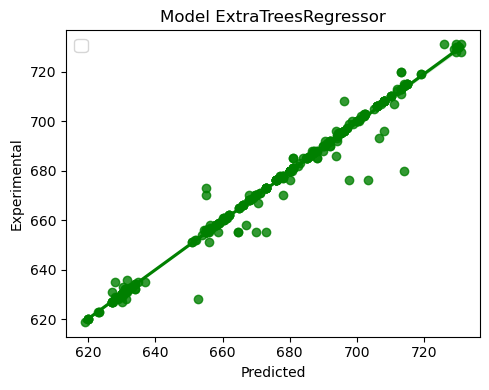

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
print("MAE ExtreTreesRegressor: %f" % mean_absolute_error(b_valid[:, ], et_preds[:, ]))
print("RMSR ExtraTreesRegressor: %f" %np.sqrt(mean_squared_error(b_valid, et_preds)))
print("R2 ExtraTreesRegressor: %f %%" %(100*r2_score(b_valid, et_preds)))
standard_deviation = np.std(et_preds)
print(f"Standard Deviation of Predictions: {standard_deviation}")

data_extra = pd.DataFrame({"Tg": b_valid ,"ExtraTrees": et_preds})

plt.figure(figsize=(5,4), dpi=100)
plt.title("Model ExtraTreesRegressor")
sns.regplot(x=et_preds, y=b_valid, color='g') 

plt.legend(loc='best', fontsize=12)

plt.xlabel("Predicted")
plt.ylabel("Experimental")

plt.tight_layout()
plt.show()

   Element    Importance
7        F  2.448521e-01
36      La  2.048026e-01
6        O  1.316498e-01
14       K  1.077127e-01
10      Al  5.522860e-02
38      Gd  3.308732e-02
35      Ba  2.308106e-02
15      Ca  2.272302e-02
9       Mg  1.701843e-02
1       Li  1.650948e-02
21      Zn  1.476987e-02
23      Ge  1.131018e-02
26       Y  1.036632e-02
16      Sc  1.017377e-02
11      Si  8.016252e-03
19      Mn  7.863460e-03
41       W  7.669455e-03
24      Rb  7.658544e-03
8       Na  7.568168e-03
25      Sr  7.066125e-03
32      Sb  5.472468e-03
40      Ta  5.442886e-03
12       P  5.047041e-03
31      Sn  5.010789e-03
22      Ga  4.949570e-03
0        H  4.602341e-03
17      Ti  4.504624e-03
28      Nb  4.010026e-03
34      Cs  3.709152e-03
39      Lu  2.348888e-03
30      In  2.262243e-03
33      Te  1.960768e-03
3        B  4.421542e-04
27      Zr  4.038701e-04
2       Be  2.818915e-04
29      Mo  1.765944e-04
37      Eu  1.021742e-04
5        N  6.831424e-05
43      Bi  4.801471e-05


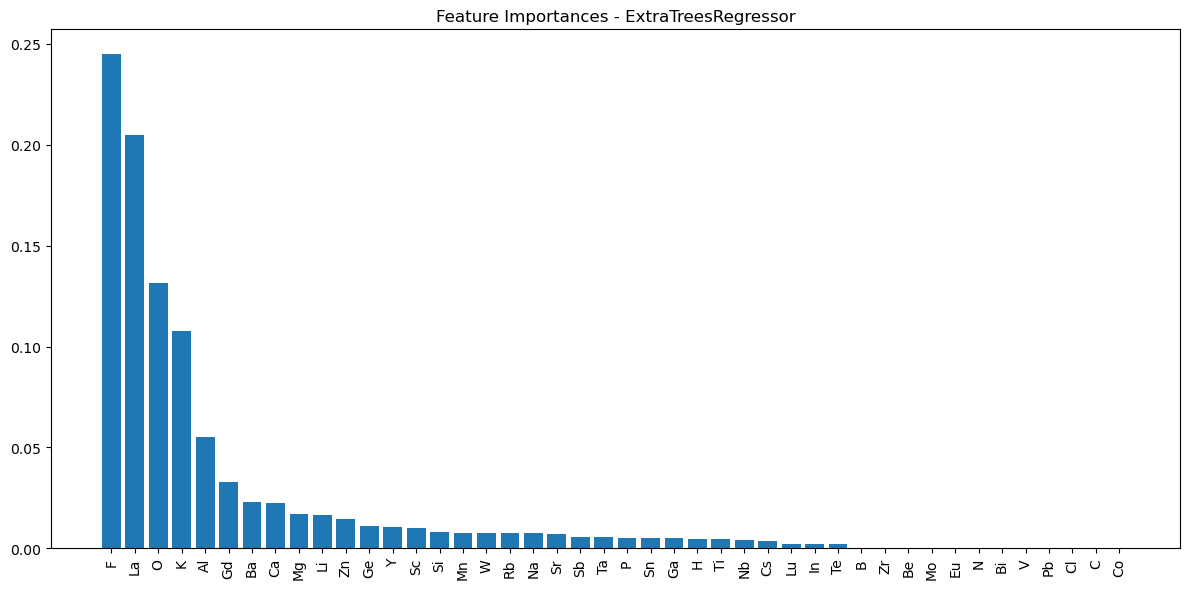

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor


et_model = ExtraTreesRegressor(**grid_search.best_params_)
et_model.fit(a_train, b_train)


importances = et_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Element": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)

feature_importance_df.to_csv("feature_importance_ExtraTrees.csv", index=False)

plt.figure(figsize=(12, 6))
plt.title("Feature Importances - ExtraTreesRegressor")
plt.bar(feature_importance_df["Element"], feature_importance_df["Importance"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



### If you want to use the trained model, please refer to the code section below.

In [18]:
from joblib import load

et_model = load("extratrees_model.joblib")

et_model

ExtraTreesRegressor(n_estimators=40, random_state=5)